# The nationality of the economists on DBpedia

In [169]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter

In [170]:
query = """

PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>

SELECT DISTINCT ?economist ?name ?nationality

WHERE { ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist dbo:nationality ?nationality1 .
        ?economist owl:sameAs ?sameAs .

        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
      }
"""

In [171]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [172]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [173]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [174]:
# Number of rows in the result
len(rc['results']['bindings'])

636

In [175]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luc-Normand_Tellier'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luc-Normand Tellier'}, 'nationality': {'type': 'literal', 'value': 'Canadians'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Lachmann'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': ''}, 'nationality': {'type': 'literal', 'value': 'Germany'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_Lachmann'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig Lachmann'}, 'nationality': {'type': 'literal', 'value': 'Germany'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwik_Maurycy_Landau'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwik Maurycy Landau'}, 'nationality': {'type': 'literal', 'value': 'Poles'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Amoroso'}, 'name': {'type': 'literal', 'xml:lang'

In [176]:
# Explore
nationalityList = []
for l in rc['results']['bindings']:
    nationalityList.append(l['nationality']['value'])

In [177]:
counterNationalityList= Counter(nationalityList)
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())), reverse=False)

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


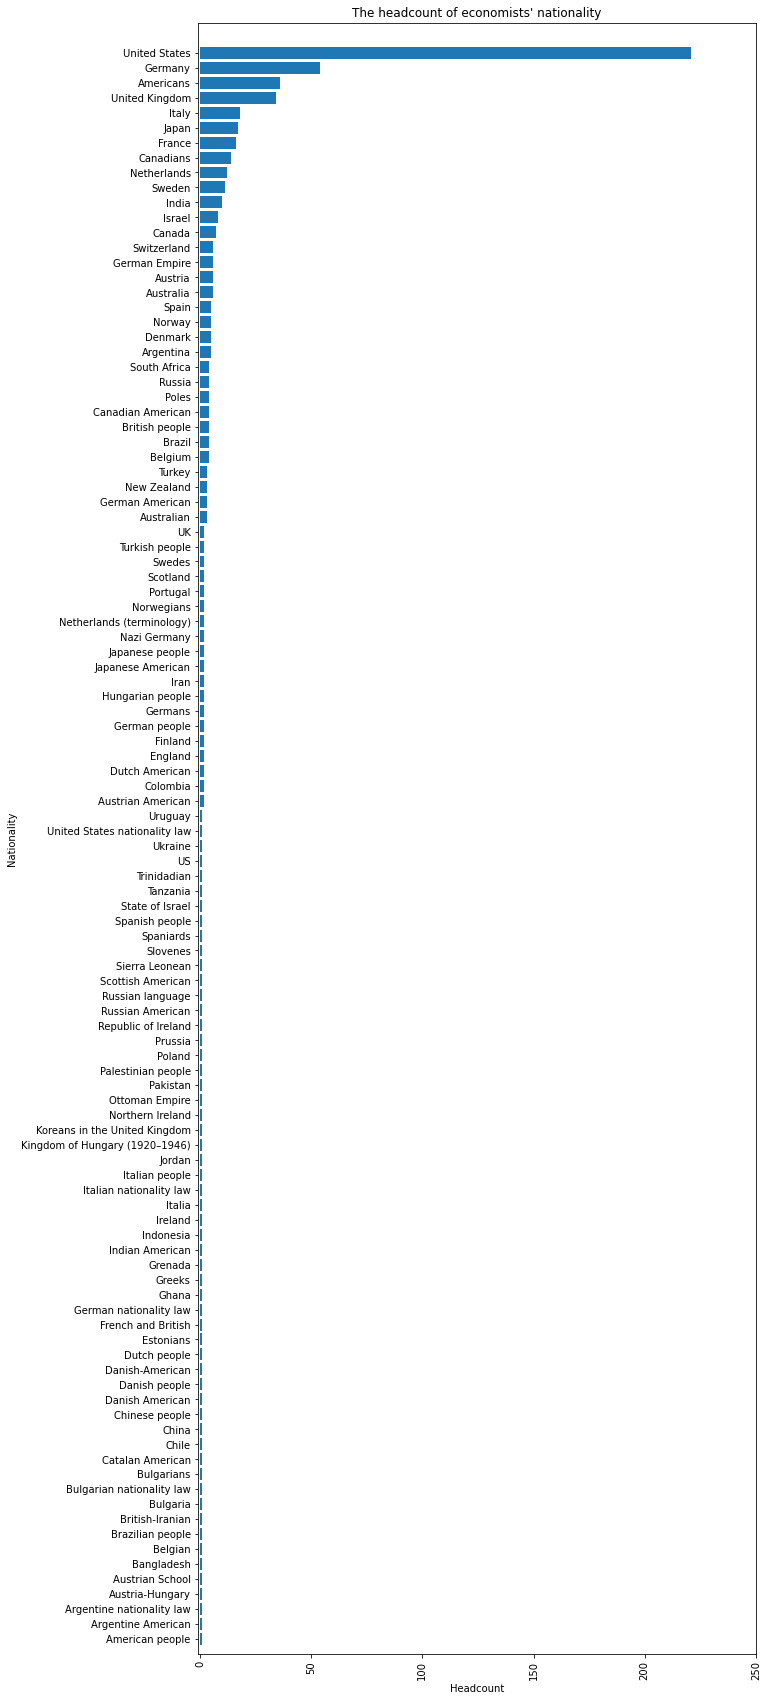

In [178]:
# Barplot
eff = [l[1] for l in groupedNationalityList]
objects = [l[0] for l in groupedNationalityList]

p1 = plt.barh(eff, objects)

plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("The headcount of economists' nationality")
plt.gcf().set_size_inches(10, 30)
plt.xticks(rotation=45)

p1 = plt.figure(1, [100, 200])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,250)
ax.set_ylim(-1,108)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [179]:
counterNationalityList= Counter(nationalityList)
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())), reverse=True)

In [180]:
bGNL=(groupedNationalityList[0:30])

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


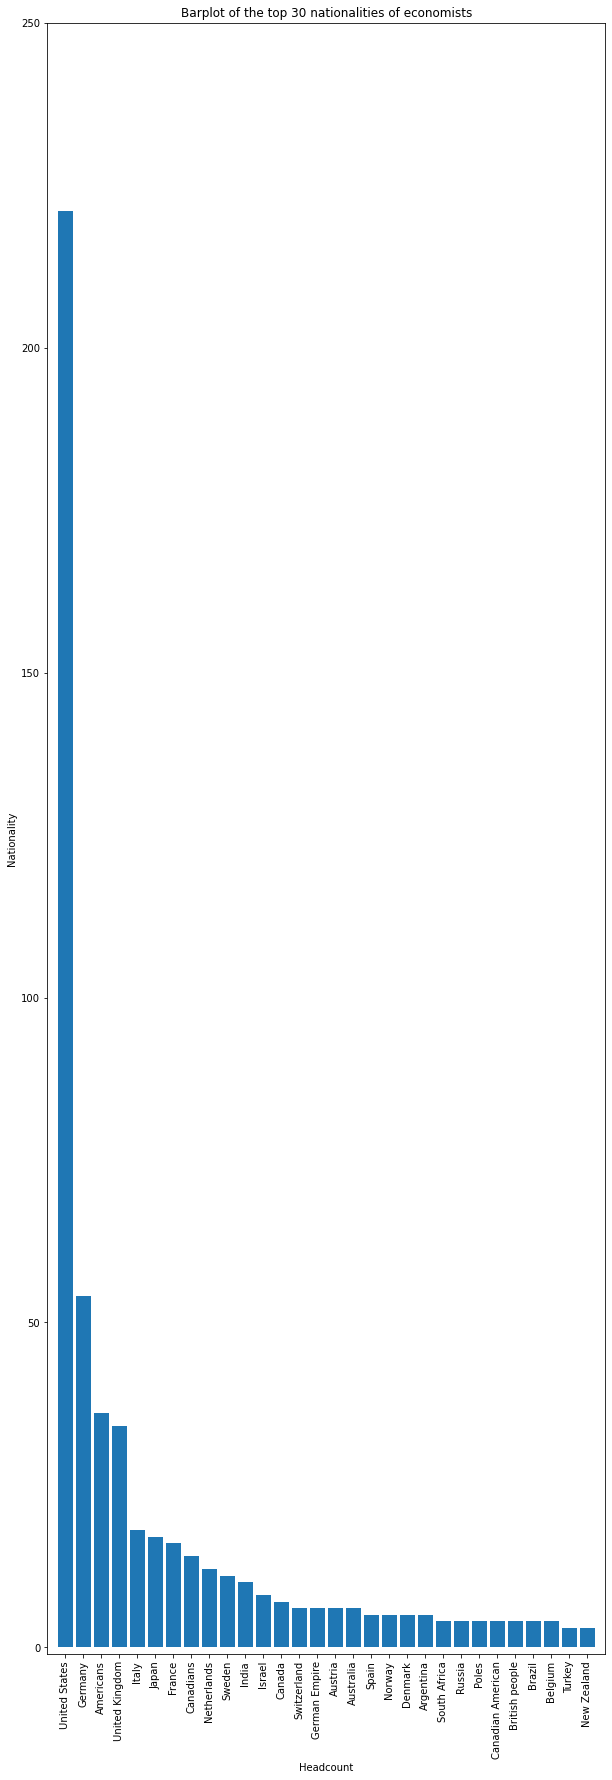

In [184]:
# Barplot of the top 30 nationalities of economists
eff = [l[1] for l in bGNL]
objects = [l[0] for l in bGNL]

p1 = plt.bar(eff, objects)

plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("Barplot of the top 30 nationalities of economists")
plt.gcf().set_size_inches(10, 30)
plt.xticks(rotation=45)

p1 = plt.figure(1, [20, 30])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,30)
ax.set_ylim(-1,250)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()



In [182]:
# We can notice that the American headcount overwhelmes the other countries headcounts. Therefore, we can try to work without it.
bGNL1=(groupedNationalityList[1:30])

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


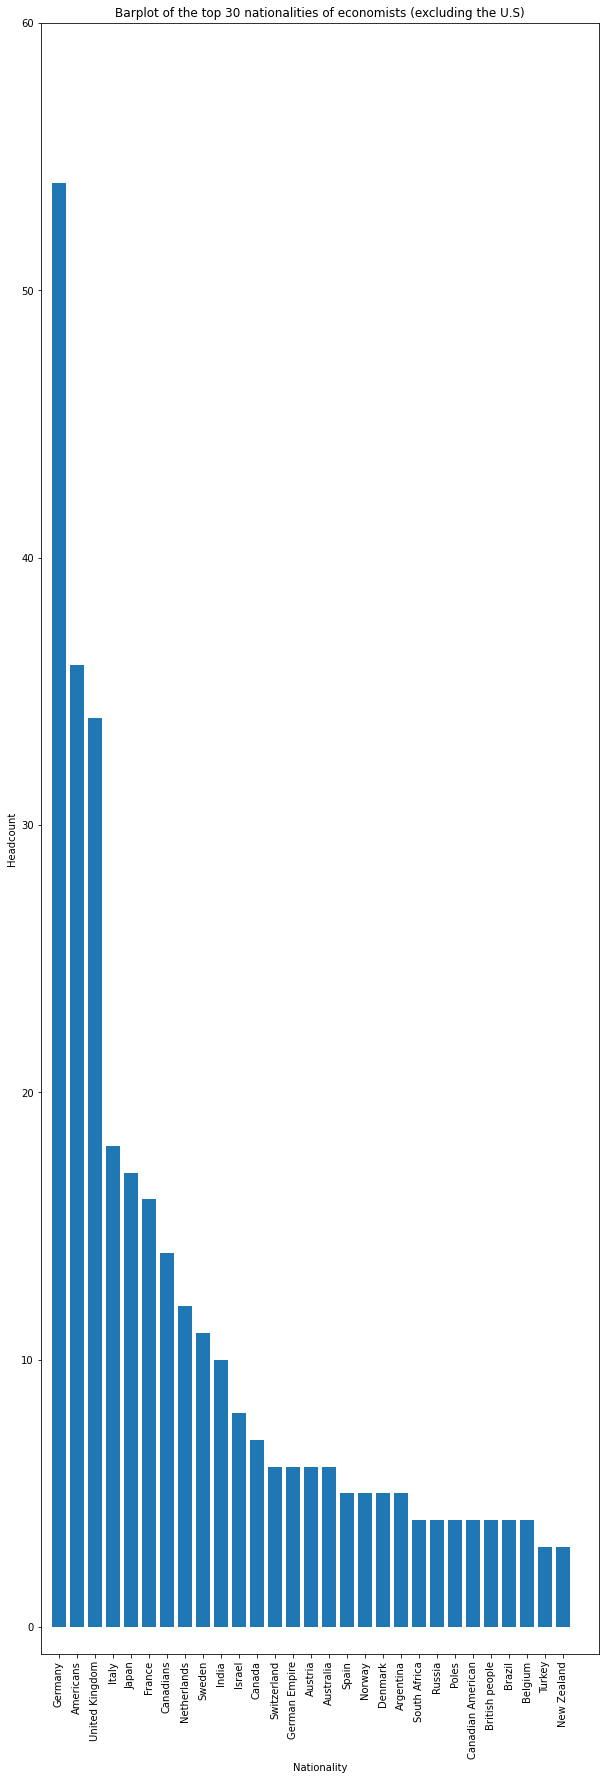

In [183]:
# Barplot of the top 30 nationalities of economists (excluding the United States)
eff = [l[1] for l in bGNL1]
objects = [l[0] for l in bGNL1]

p1 = plt.bar(eff, objects)

plt.xlabel('Nationality')
plt.ylabel('Headcount')
plt.title("Barplot of the top 30 nationalities of economists (excluding the U.S)")
plt.gcf().set_size_inches(10, 30)
plt.xticks(rotation=45)

p1 = plt.figure(1, [20, 30])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,30)
ax.set_ylim(-1,60)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()